SyntaxError: invalid syntax (3219149109.py, line 158)

Loaded metrics data from metrics.csv successfully.
Loaded train DataFrame from COG_train1.feather and validation DataFrame from COG_val1.feather.
Downloaded cog-20.def.tab successfully.


/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/3219428552.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_single_cat, x="Category_Label", y=metric, order=order, palette=category_palette)


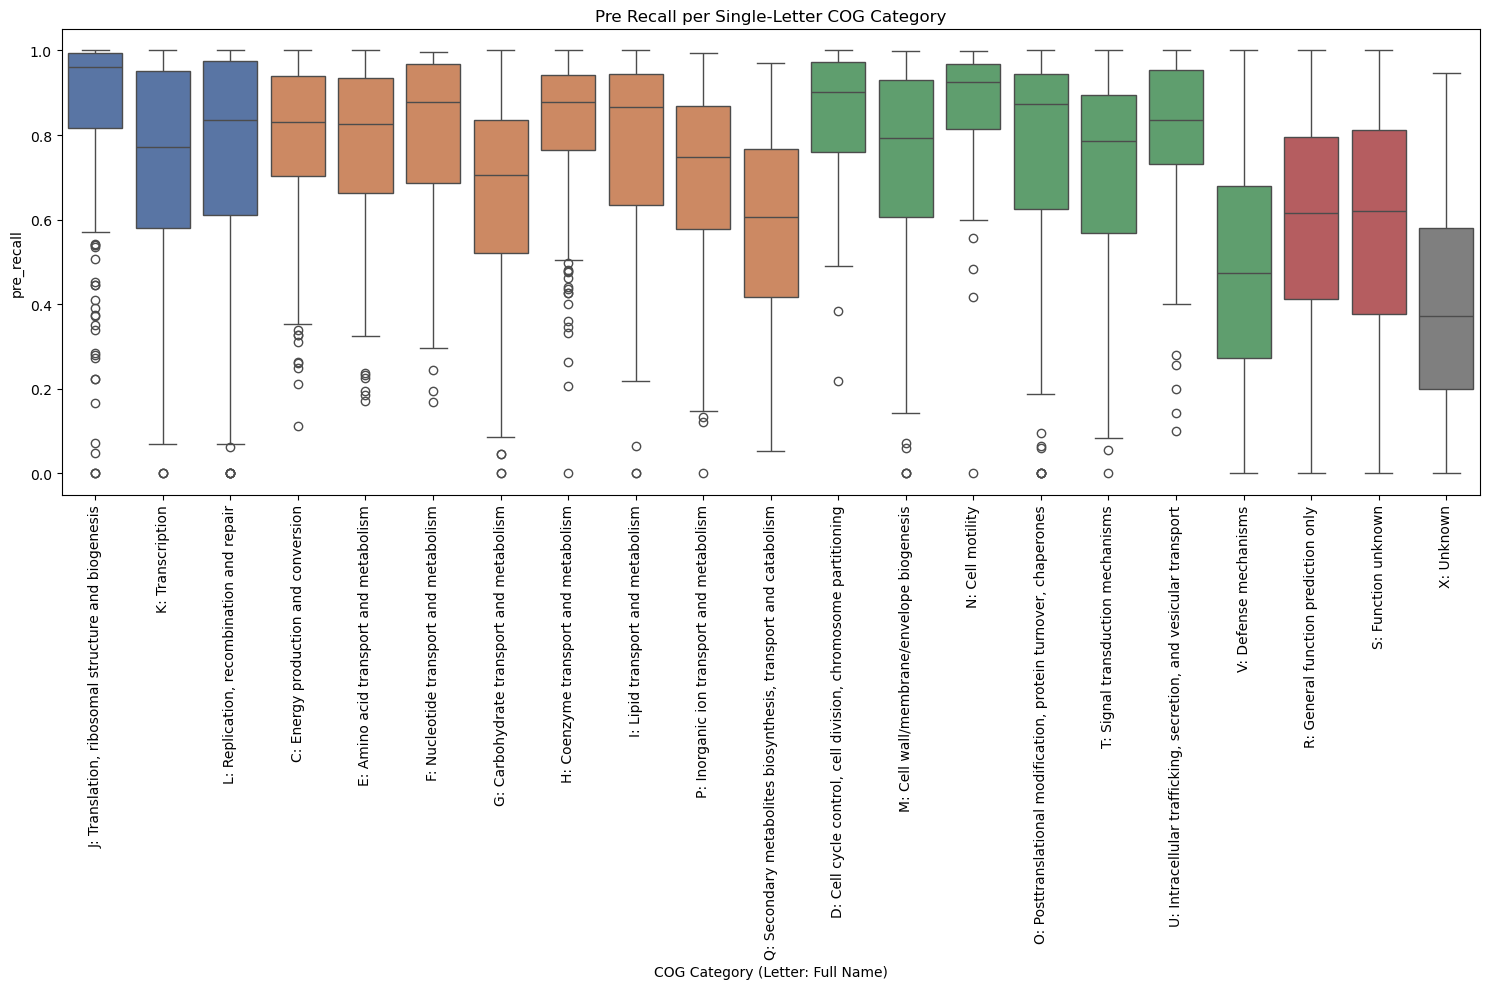

/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/3219428552.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_single_cat, x="Category_Label", y=metric, order=order, palette=category_palette)


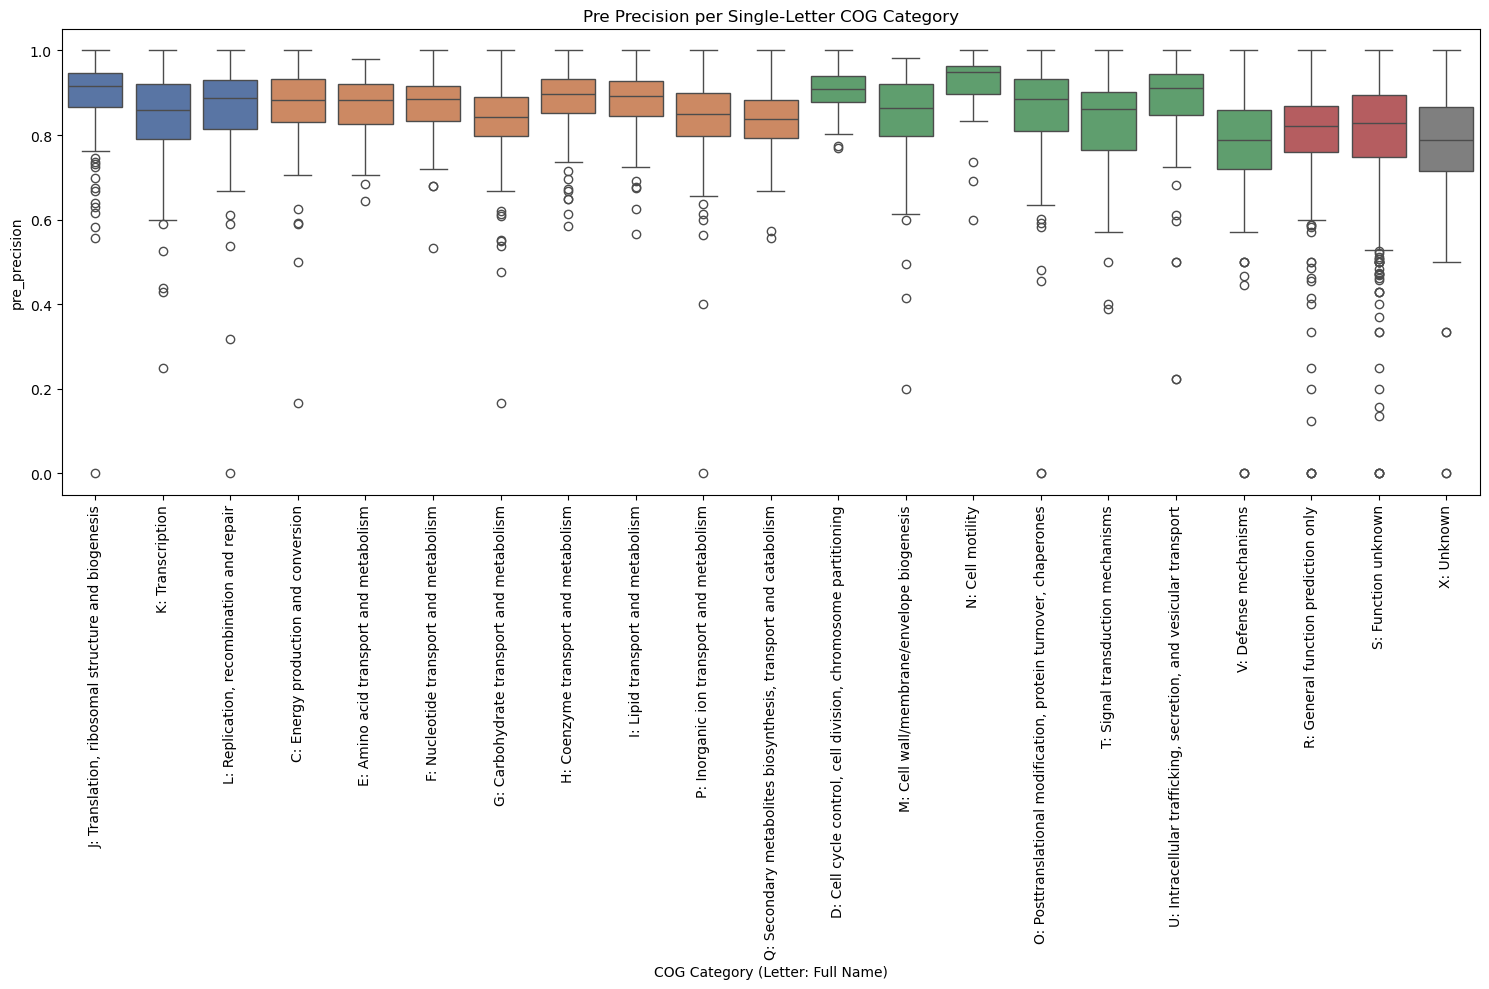

/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/3219428552.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_single_cat, x="Category_Label", y=metric, order=order, palette=category_palette)


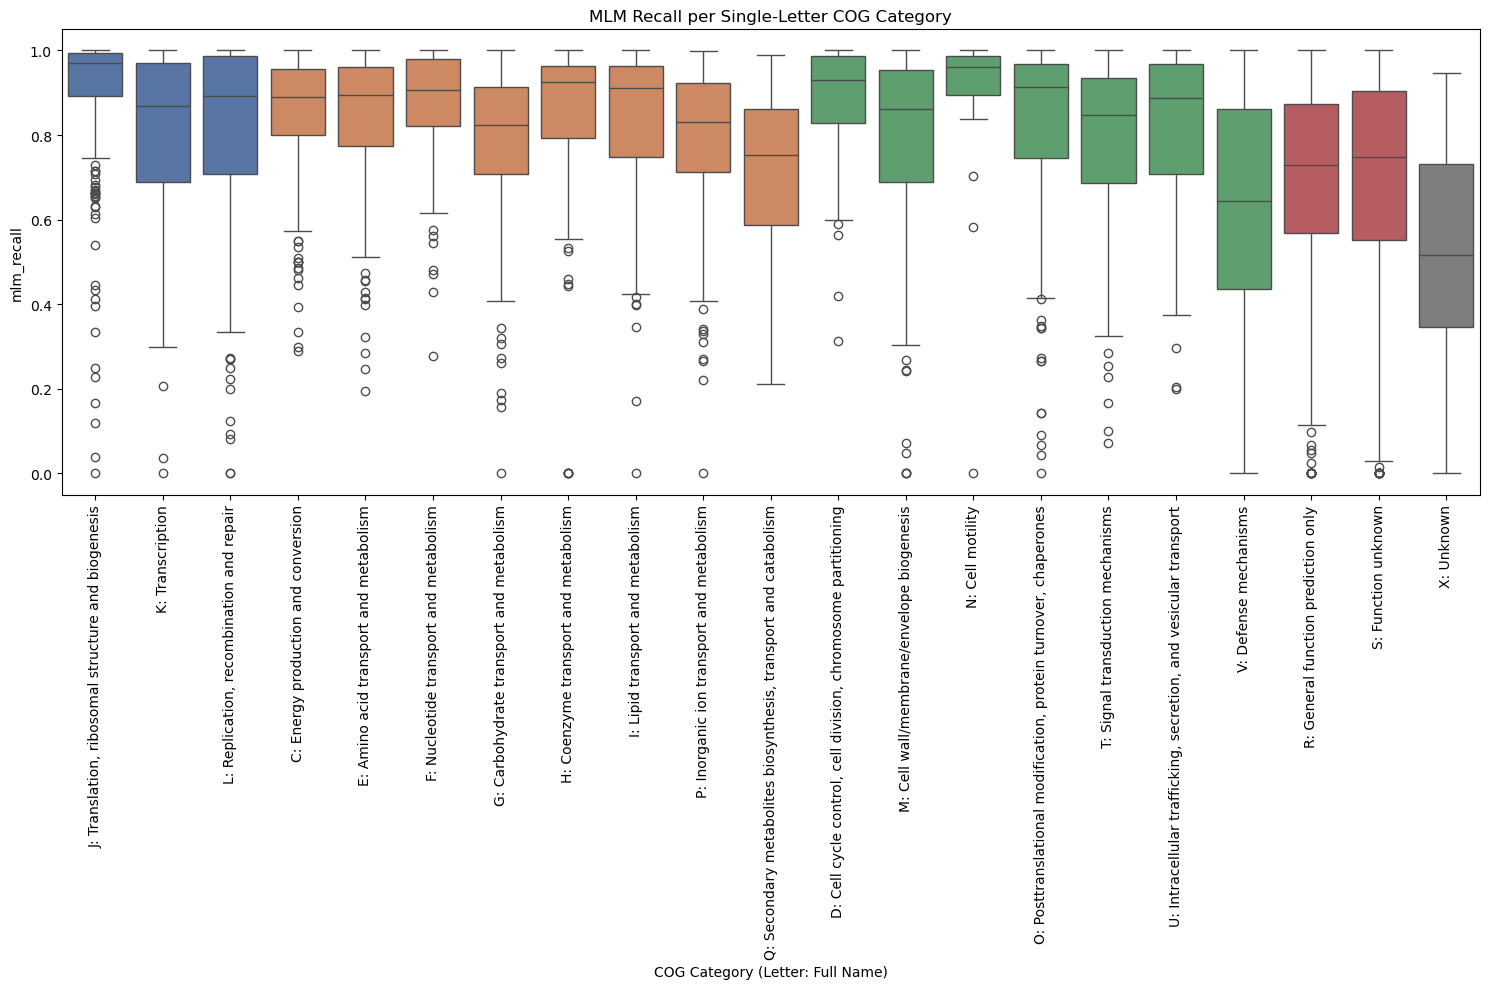

/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/3219428552.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_single_cat, x="Category_Label", y=metric, order=order, palette=category_palette)


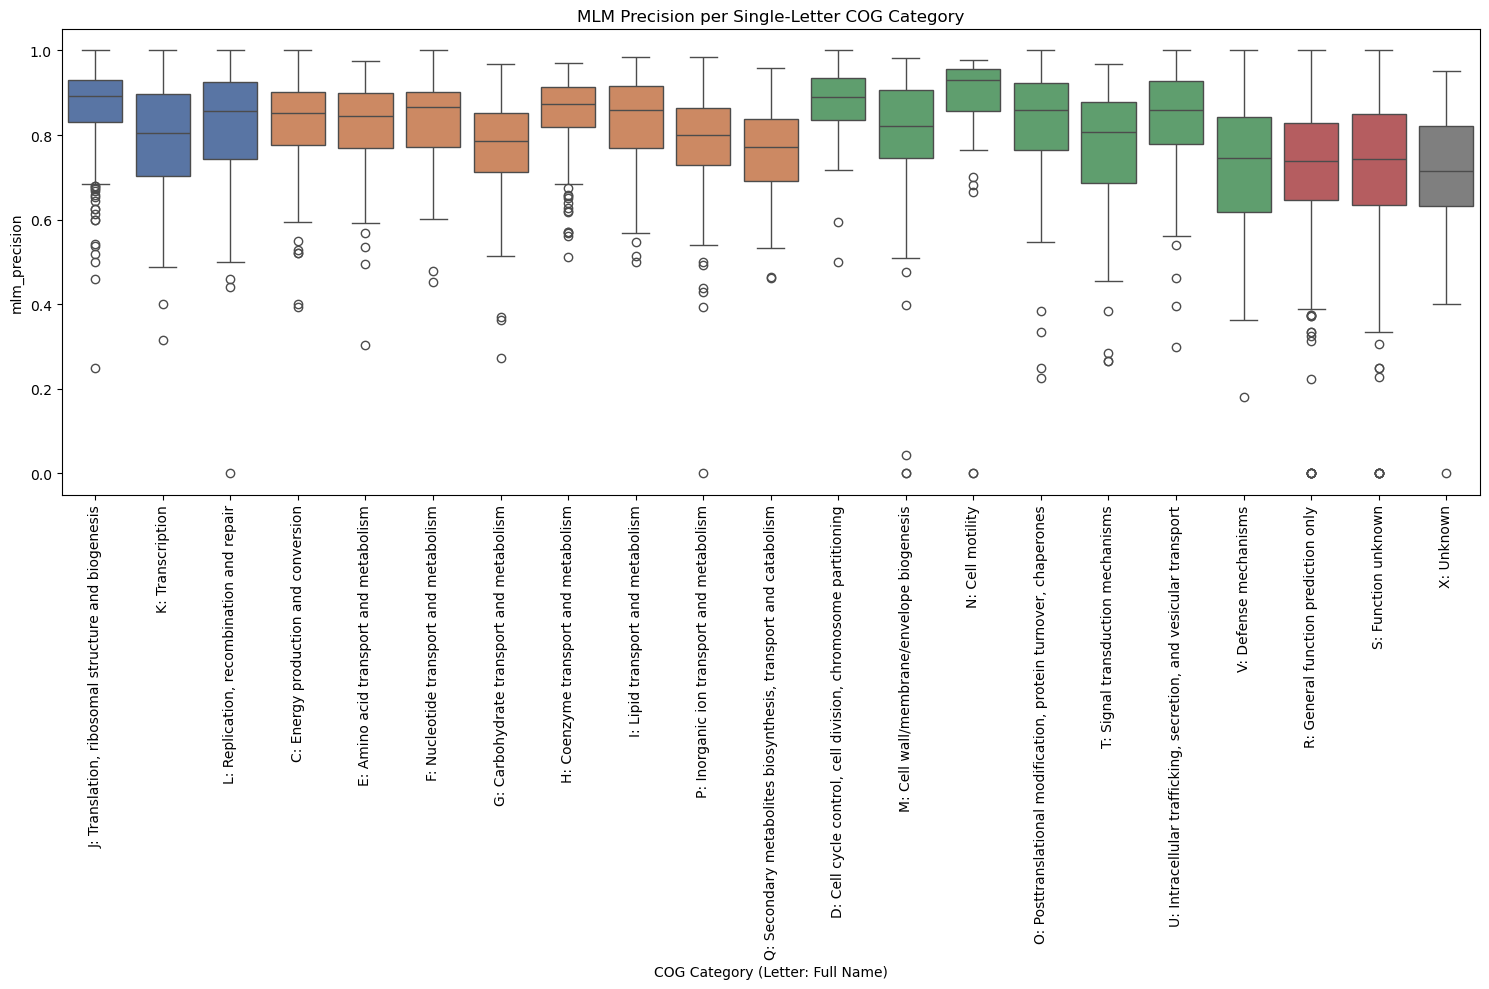

/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/3219428552.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="Metacategory", y=metric, order=metacats_present,palette="deep")


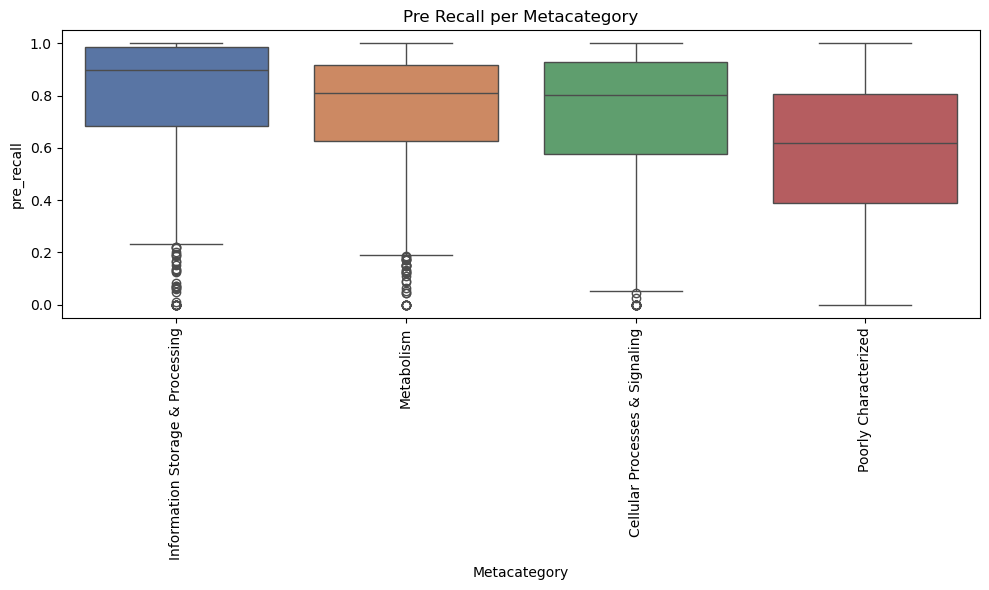

/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/3219428552.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="Metacategory", y=metric, order=metacats_present,palette="deep")


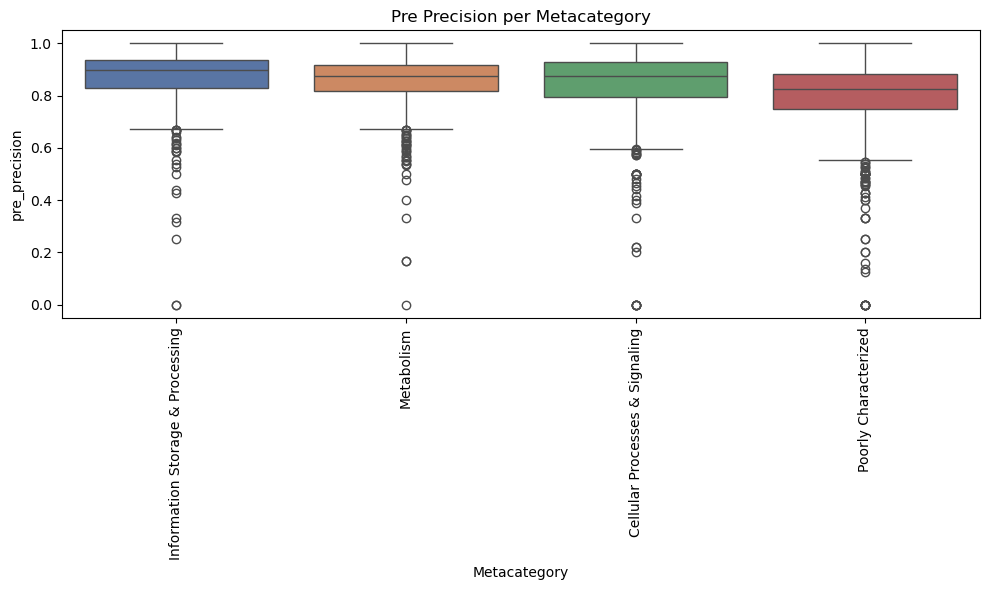

/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/3219428552.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="Metacategory", y=metric, order=metacats_present,palette="deep")


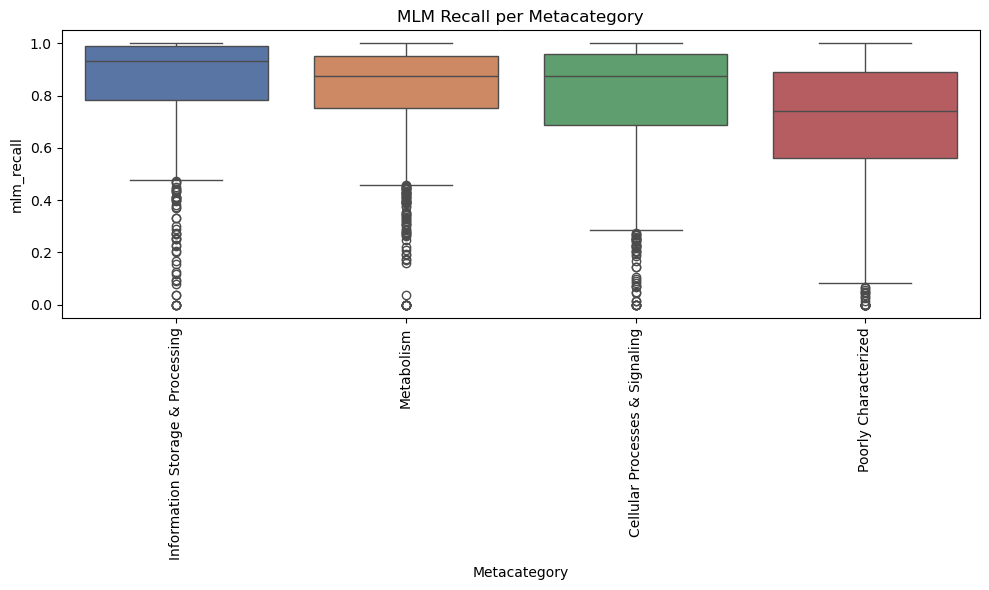

/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/3219428552.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="Metacategory", y=metric, order=metacats_present,palette="deep")


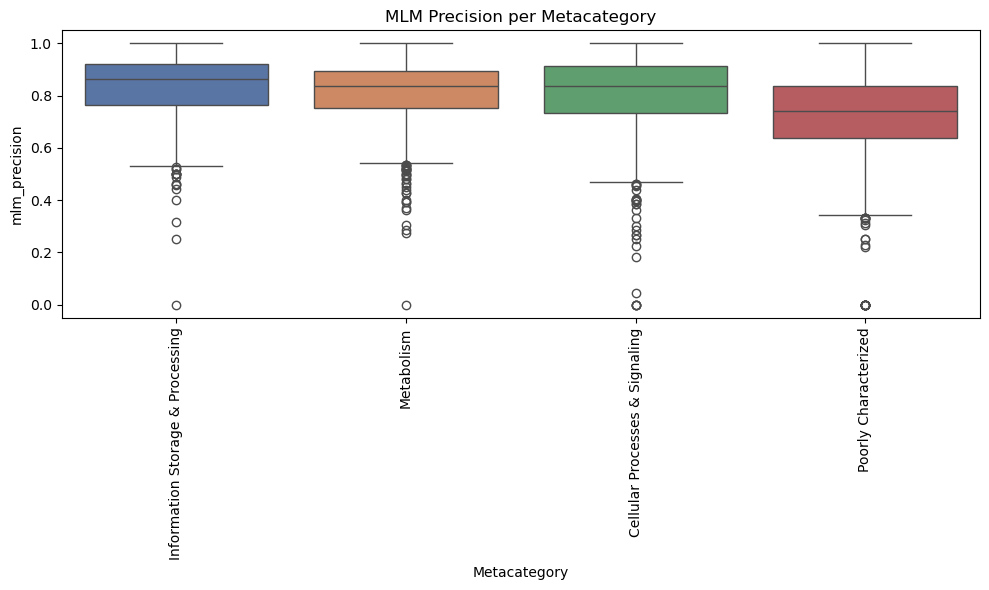

10 Best COGs by Pre Recall:
    COG  pre_TP  pre_TN  pre_FP  pre_FN  MLM_TP  MLM_TN  MLM_FP  MLM_FN  COG_ID Category                                                                                                 Description Gene_Symbol                   Function                      Extra PDB_ID                     Metacategory  pre_accuracy  mlm_accuracy  pre_recall  mlm_recall  pre_precision  mlm_precision
COG4800      13    2247       2       0      13    2244       5       0 COG4800        K                                                      Predicted transcriptional regulator with an HTH domain         NaN                        NaN                        NaN    NaN Information Storage & Processing      0.999116      0.997790         1.0    1.000000       0.866667       0.722222
COG4037      10    2252       0       0       6    2252       0       4 COG4037        C                                                                 Energy-converting hydrogenase Eha subunit F      

In [2]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load the Metrics CSV Data from File
# ---------------------------
df_metrics = pd.read_csv("COG_metrics_FN0.0_FP0.0.csv")
print("Loaded metrics data from metrics.csv successfully.")

def print_to_file(msg):
    print(msg)  # Replace with your logging function if needed

def fast_load_dfs(train_path='train.feather', val_path='val.feather', frac=0.01):
    """
    Load train and validation DataFrames from Feather files,
    and return a fraction of the rows (default 1%).

    Parameters:
        train_path (str): Path to the training DataFrame feather file.
        val_path (str): Path to the validation DataFrame feather file.
        frac (float): Fraction of rows to return from each DataFrame (0 < frac <= 1).
                      Default is 0.01 (i.e. 1% of the data).

    Returns:
        tuple: (train_df, val_df) as sampled Pandas DataFrames.
    """
    train_df = pd.read_feather(train_path)
    val_df = pd.read_feather(val_path)
    print_to_file(f"Loaded train DataFrame from {train_path} and validation DataFrame from {val_path}.")

    if frac < 1.0:
        train_df = train_df.sample(frac=frac, random_state=42)
        val_df = val_df.sample(frac=frac, random_state=42)

    return train_df, val_df


train_df, val_df = fast_load_dfs('COG_train1.feather', 'COG_val1.feather', frac=1.)

# ---------------------------
# 2. Download and Parse the COG Definitions File
# ---------------------------
url = "https://ftp.ncbi.nih.gov/pub/COG/COG2020/data/cog-20.def.tab"
response = requests.get(url)
if response.status_code == 200:
    with open("cog-20.def.tab", "wb") as f:
        f.write(response.content)
    print("Downloaded cog-20.def.tab successfully.")
else:
    raise Exception(f"Error downloading file: HTTP {response.status_code}")

df_cog = pd.read_csv("cog-20.def.tab", sep="\t", header=None, engine="python", encoding="latin1")
df_cog.columns = ["COG_ID", "Category", "Description", "Gene_Symbol", "Function", "Extra", "PDB_ID"]

# ---------------------------
# 3. Map to Canonical Metacategories
# ---------------------------
# Group letters into broader metacategories
meta_map = {
    "S": "Poorly Characterized", "R": "Poorly Characterized",
    "Q": "Metabolism", "P": "Metabolism", "I": "Metabolism",
    "H": "Metabolism", "F": "Metabolism", "E": "Metabolism",
    "G": "Metabolism", "C": "Metabolism",
    "O": "Cellular Processes & Signaling", "U": "Cellular Processes & Signaling", "W": "Cellular Processes & Signaling",
    "N": "Cellular Processes & Signaling", "M": "Cellular Processes & Signaling", "T": "Cellular Processes & Signaling",
    "V": "Cellular Processes & Signaling", "D": "Cellular Processes & Signaling",
    "B": "Information Storage & Processing", "L": "Information Storage & Processing", "K": "Information Storage & Processing",
    "A": "Information Storage & Processing", "J": "Information Storage & Processing"
}

def assign_metacategory(cat_str, meta_map):
    counts = {}
    for letter in str(cat_str):
        if letter in meta_map:
            mc = meta_map[letter]
            counts[mc] = counts.get(mc, 0) + 1
    if counts:
        return max(counts, key=counts.get)
    else:
        return None

df_cog["Metacategory"] = df_cog["Category"].apply(lambda x: assign_metacategory(x, meta_map))

# ---------------------------
# 4. Merge Metrics with COG Definitions
# ---------------------------
merged_df = pd.merge(df_metrics, df_cog, left_on="COG", right_on="COG_ID", how="left")

# ---------------------------
# 5. Compute Performance Metrics
# ---------------------------
merged_df["pre_accuracy"] = (merged_df["pre_TP"] + merged_df["pre_TN"]) / (
    merged_df["pre_TP"] + merged_df["pre_TN"] + merged_df["pre_FP"] + merged_df["pre_FN"]
)
merged_df["mlm_accuracy"] = (merged_df["MLM_TP"] + merged_df["MLM_TN"]) / (
    merged_df["MLM_TP"] + merged_df["MLM_TN"] + merged_df["MLM_FP"] + merged_df["MLM_FN"]
)

merged_df["pre_recall"] = merged_df["pre_TP"] / (merged_df["pre_TP"] + merged_df["pre_FN"])
merged_df["mlm_recall"] = merged_df["MLM_TP"] / (merged_df["MLM_TP"] + merged_df["MLM_FN"])

merged_df["pre_precision"] = merged_df["pre_TP"] / (merged_df["pre_TP"] + merged_df["pre_FP"])
merged_df["mlm_precision"] = merged_df["MLM_TP"] / (merged_df["MLM_TP"] + merged_df["MLM_FP"])

# ---------------------------
# 6. Boxplots by Single-Letter COG Category with Full Category Name Lookup,
#     Using the Same Color for the Same Metacategory
# ---------------------------
# Define a lookup for full descriptive names for each COG category.
category_full_names = {
    "J": "Translation, ribosomal structure and biogenesis",
    "A": "RNA processing and modification",
    "K": "Transcription",
    "L": "Replication, recombination and repair",
    "B": "Chromatin structure and dynamics",
    "D": "Cell cycle control, cell division, chromosome partitioning",
    "Y": "Nuclear structure",
    "V": "Defense mechanisms",
    "T": "Signal transduction mechanisms",
    "M": "Cell wall/membrane/envelope biogenesis",
    "N": "Cell motility",
    "Z": "Cytoskeleton",
    "W": "Extracellular structures",
    "U": "Intracellular trafficking, secretion, and vesicular transport",
    "O": "Posttranslational modification, protein turnover, chaperones",
    "C": "Energy production and conversion",
    "E": "Amino acid transport and metabolism",
    "F": "Nucleotide transport and metabolism",
    "G": "Carbohydrate transport and metabolism",
    "H": "Coenzyme transport and metabolism",
    "I": "Lipid transport and metabolism",
    "P": "Inorganic ion transport and metabolism",
    "Q": "Secondary metabolites biosynthesis, transport and catabolism",
    "R": "General function prediction only",
    "S": "Function unknown"
}

# Filter to rows where the Category is a single letter.
df_single_cat = merged_df[merged_df["Category"].apply(lambda x: len(str(x)) == 1)].copy()

# Create a new descriptive label column using the lookup.
df_single_cat["Category_Label"] = df_single_cat["Category"].apply(
    lambda x: f"{x}: {category_full_names.get(x, 'Unknown')}"
)

# Define a custom order for metacategories.
custom_order = ["Information Storage & Processing", "Metabolism", "Cellular Processes & Signaling", "Poorly Characterized"]

# Define the list of category letters to skip.
skip_list = ["A", "B", "W", "Z"]

# Sort unique letters by the order of their metacategory (using meta_map and custom_order) then by letter,
# while skipping those in skip_list.
unique_letters = sorted(
    [letter for letter in df_single_cat["Category"].unique() if letter not in skip_list],
    key=lambda x: (custom_order.index(meta_map.get(x, "")) if meta_map.get(x, "") in custom_order else 100, x)
)
order = [f"{letter}: {category_full_names.get(letter, 'Unknown')}" for letter in unique_letters]

# Use seaborn's deep palette for the metacategories in the desired order.
deep_colors = sns.color_palette("deep", n_colors=len(custom_order))
meta_to_color = dict(zip(custom_order, deep_colors))

# Build a palette for each category label using the metacategory color.
category_palette = {}
for lbl in order:
    letter = lbl.split(":")[0].strip()
    mc = meta_map.get(letter, "Unknown")
    category_palette[lbl] = meta_to_color.get(mc, "#7f7f7f")  # default to gray if missing

# Plot the boxplots with the palette.
metrics = [
#    ("pre_accuracy", "Pre Accuracy"),
    ("pre_recall", "Pre Recall"),
    ("pre_precision", "Pre Precision"),
#    ("mlm_accuracy", "MLM Accuracy"),
    ("mlm_recall", "MLM Recall"),
    ("mlm_precision", "MLM Precision"),
]



for metric, label in metrics:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df_single_cat, x="Category_Label", y=metric, order=order, palette=category_palette)
    plt.title(f"{label} per Single-Letter COG Category")
    plt.xlabel("COG Category (Letter: Full Name)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
# ---------------------------
# 7. Boxplots by Metacategory with Custom Order
# ---------------------------
metacats_present = [cat for cat in custom_order if cat in merged_df["Metacategory"].unique()]
for metric, label in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_df, x="Metacategory", y=metric, order=metacats_present,palette="deep")
    plt.title(f"{label} per Metacategory")
    plt.xlabel("Metacategory")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# ---------------------------
# 8. Print Full Info for 10 Best and Worst Recall and Precision COGs
# ---------------------------
print("10 Best COGs by Pre Recall:")
print(merged_df.sort_values("pre_recall", ascending=False).head(10).to_string(index=False))

print("\n10 Worst COGs by Pre Recall:")
print(merged_df.sort_values("pre_recall", ascending=True).head(10).to_string(index=False))

print("\n10 Best COGs by Pre Precision:")
print(merged_df.sort_values("pre_precision", ascending=False).head(10).to_string(index=False))

print("\n10 Worst COGs by Pre Precision:")
print(merged_df.sort_values("pre_precision", ascending=True).head(10).to_string(index=False))

print("\n10 Best COGs by MLM Recall:")
print(merged_df.sort_values("mlm_recall", ascending=False).head(10).to_string(index=False))

print("\n10 Worst COGs by MLM Recall:")
print(merged_df.sort_values("mlm_recall", ascending=True).head(10).to_string(index=False))

print("\n10 Best COGs by MLM Precision:")
print(merged_df.sort_values("mlm_precision", ascending=False).head(10).to_string(index=False))

print("\n10 Worst COGs by MLM Precision:")
print(merged_df.sort_values("mlm_precision", ascending=True).head(10).to_string(index=False))



/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/308404988.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/308404988.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


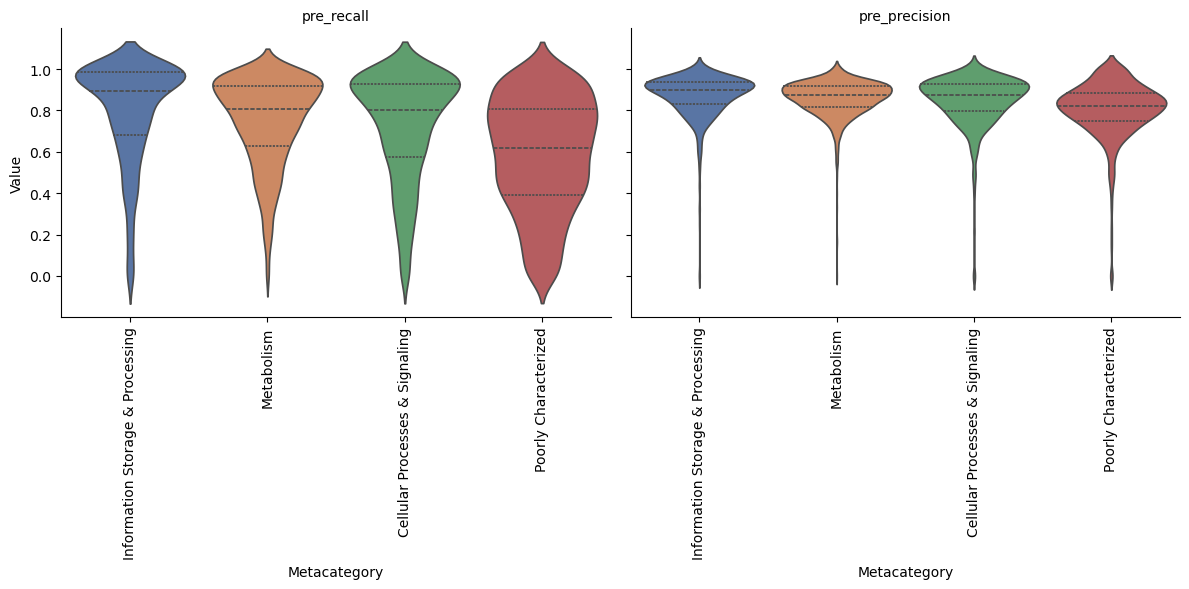

/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/308404988.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/s5/5qyfbtgx7wdd9zg3q4zplgkc0000gn/T/ipykernel_14319/308404988.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


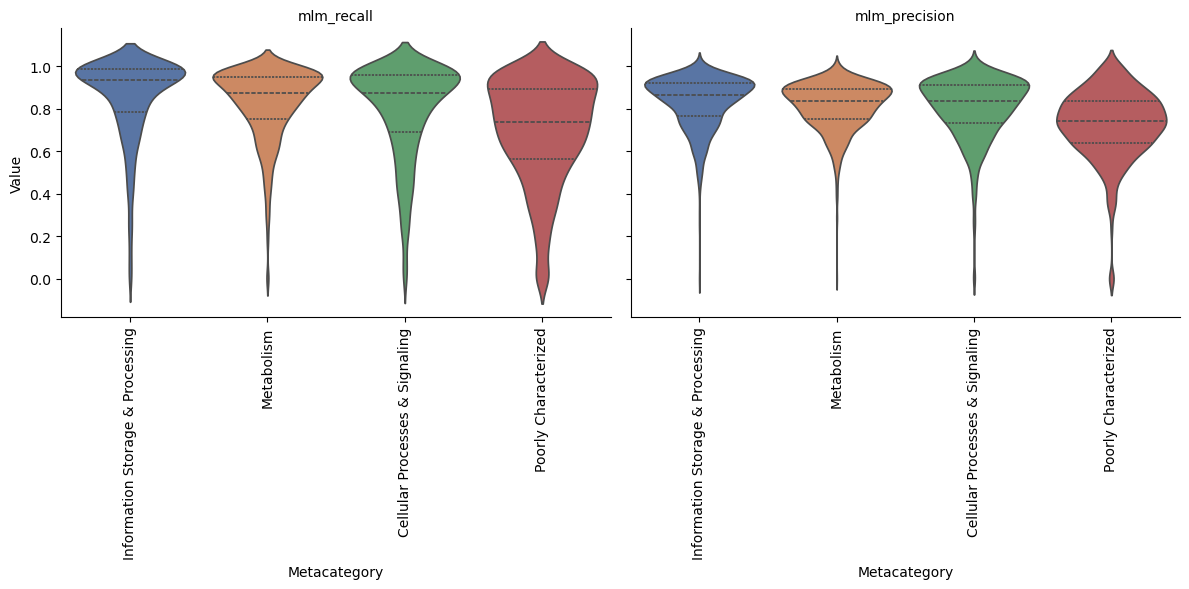

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume custom_order and meta_to_color are defined as before:
custom_order = ["Information Storage & Processing", "Metabolism", "Cellular Processes & Signaling", "Poorly Characterized"]
deep_colors = sns.color_palette("deep", n_colors=len(custom_order))
meta_to_color = dict(zip(custom_order, deep_colors))

# Also assume metacats_present is defined as:
metacats_present = [cat for cat in custom_order if cat in merged_df["Metacategory"].unique()]

# Create a DataFrame containing only the two metrics and Metacategory.
df_melted = merged_df.melt(id_vars=["Metacategory"], 
                           value_vars=["pre_recall", "pre_precision"], 
                           var_name="Metric", value_name="Value")

# Filter to only metacategories in our custom order.
df_melted = df_melted[df_melted["Metacategory"].isin(metacats_present)]

# Create the violin plots using catplot with Metric as column.
g = sns.catplot(
    data=df_melted, 
    kind="violin", 
    x="Metacategory", 
    y="Value", 
    hue="Metacategory",
    col="Metric",
    order=metacats_present,
    palette=meta_to_color,
    inner="quartile",
    dodge=False,
    height=6,
    aspect=1
)

# Rotate x-axis labels by 90° and set y-axis lower limit to 0 for each facet.
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    #ax.set_ylim(bottom=0)  # force y-axis to start at 0
    #ax.set_ylim(top=1)  # force y-axis to start at 0

# Optional: remove the redundant legend since the x-axis labels already indicate the metacategory.
#g._legend.remove()

g.set_axis_labels("Metacategory", "Value")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Assume custom_order and meta_to_color are defined as before:
custom_order = ["Information Storage & Processing", "Metabolism", "Cellular Processes & Signaling", "Poorly Characterized"]
deep_colors = sns.color_palette("deep", n_colors=len(custom_order))
meta_to_color = dict(zip(custom_order, deep_colors))

# Also assume metacats_present is defined as:
metacats_present = [cat for cat in custom_order if cat in merged_df["Metacategory"].unique()]

# Create a DataFrame containing only the two metrics and Metacategory.
df_melted = merged_df.melt(id_vars=["Metacategory"], 
                           value_vars=["mlm_recall", "mlm_precision"], 
                           var_name="Metric", value_name="Value")

# Filter to only metacategories in our custom order.
df_melted = df_melted[df_melted["Metacategory"].isin(metacats_present)]

# Create the violin plots using catplot with Metric as column.
g = sns.catplot(
    data=df_melted, 
    kind="violin", 
    x="Metacategory", 
    y="Value", 
    hue="Metacategory",
    col="Metric",
    order=metacats_present,
    palette=meta_to_color,
    inner="quartile",
    dodge=False,
    height=6,
    aspect=1
)

# Rotate x-axis labels by 90° and set y-axis lower limit to 0 for each facet.
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    #ax.set_ylim(bottom=0)  # force y-axis to start at 0
    #ax.set_ylim(top=1)  # force y-axis to start at 0

# Optional: remove the redundant legend since the x-axis labels already indicate the metacategory.
#g._legend.remove()

g.set_axis_labels("Metacategory", "Value")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

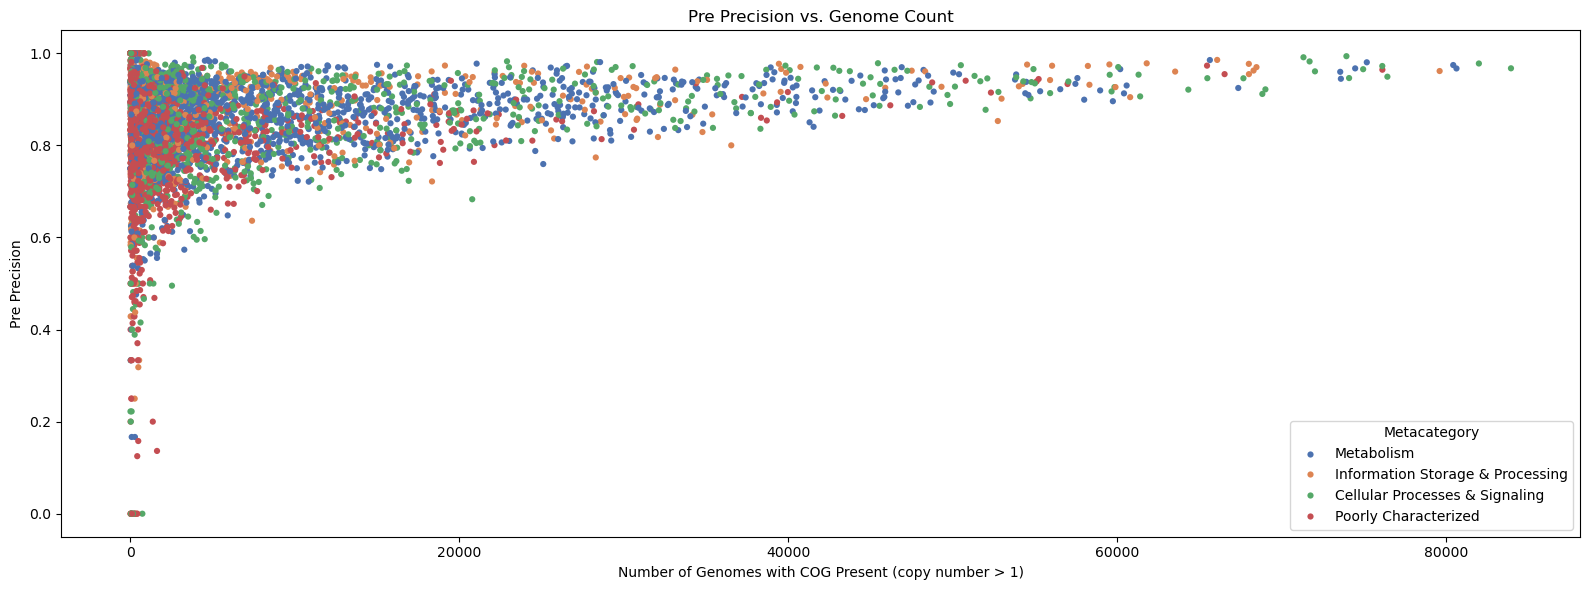

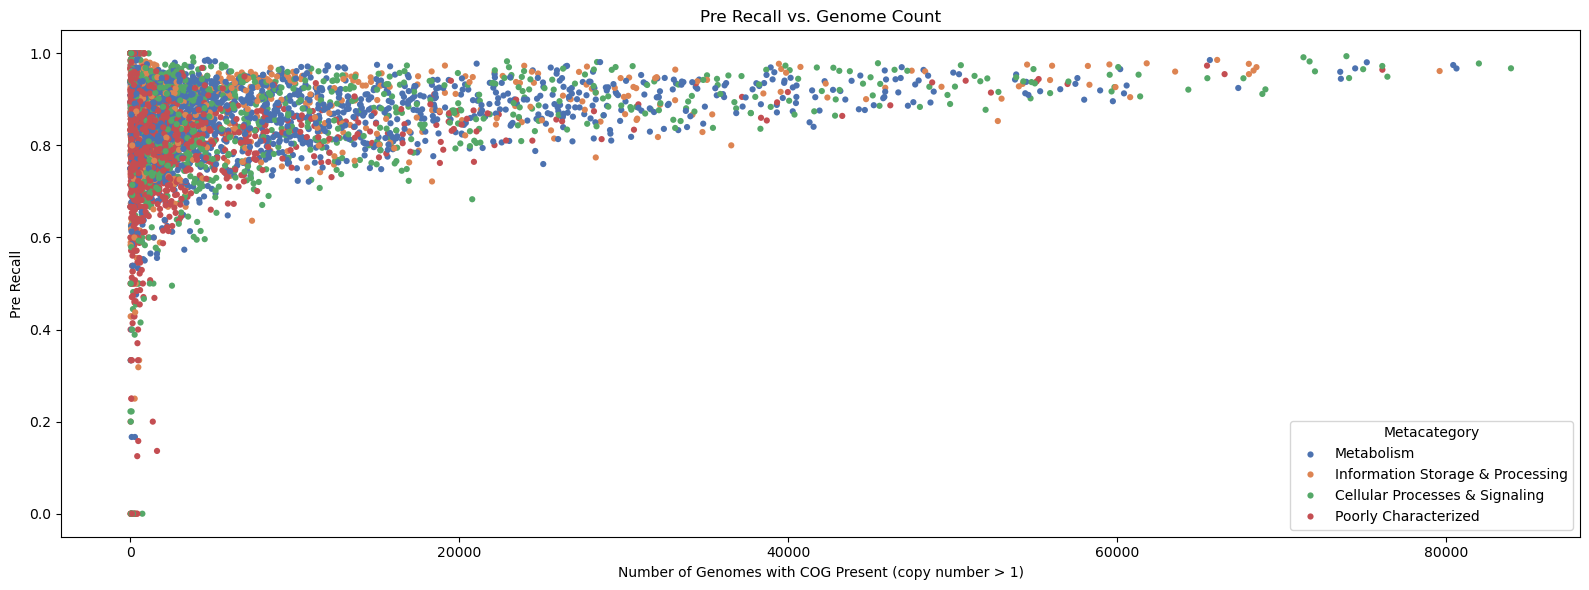

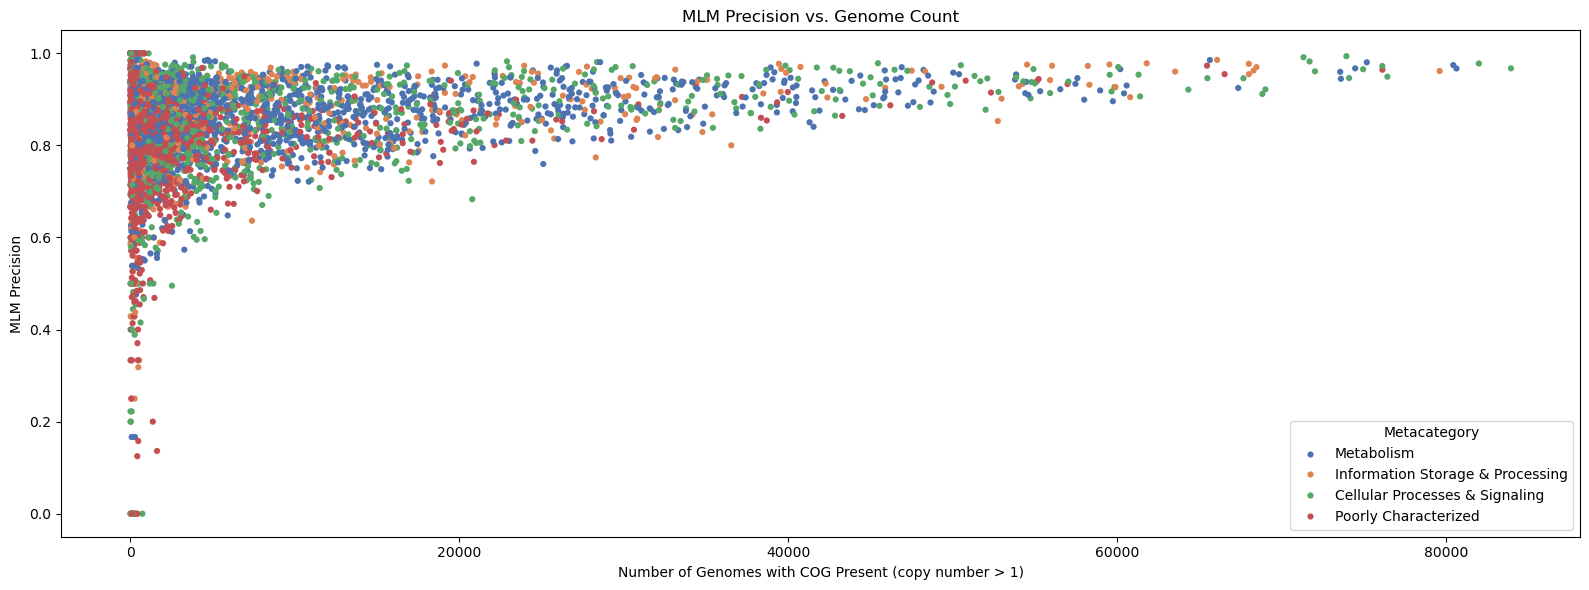

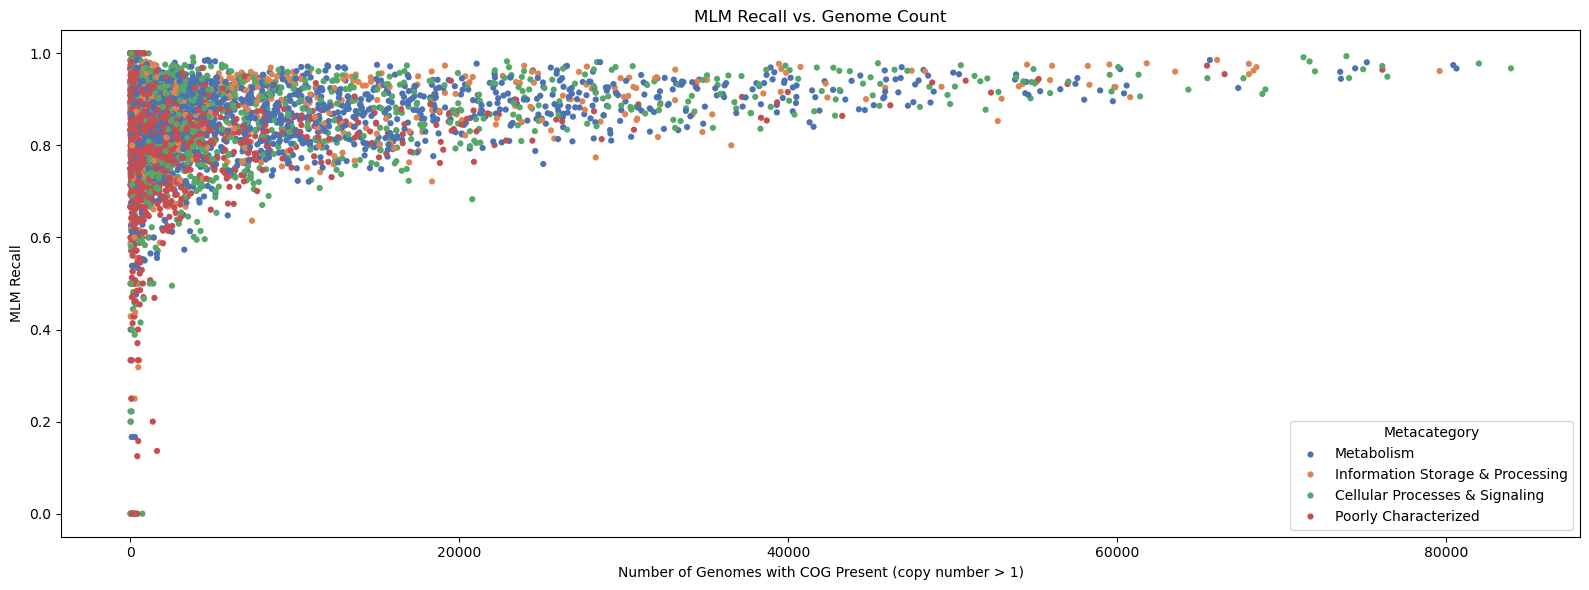

In [4]:
# ---------------------------
# 1. Compute Genome Presence Counts for Each COG
# ---------------------------
# Here we assume train_df is already loaded and has columns like "COG0001", "COG0002", etc.
# We'll filter for columns that start with "COG".
cog_columns = [col for col in train_df.columns if col.startswith("COG")]

# For each COG, count the number of genomes where the copy number is > 1.
genome_counts = {cog: (train_df[cog] > 1).sum() for cog in cog_columns}

# Create a DataFrame with the counts.
df_counts = pd.DataFrame(list(genome_counts.items()), columns=["COG", "Genome_Count"])

# ---------------------------
# 2. Merge Genome Counts with Performance Metrics
# ---------------------------
# Here, merged_df is assumed to contain the performance metrics for each COG 
# (for example, computed earlier from your metrics.csv and COG definitions).
# It should have a column "COG" that matches the keys in df_counts.
merged_perf = pd.merge(merged_df, df_counts, on="COG", how="left")

# ---------------------------
# 3. Plot Genome Counts vs. Performance Metrics
# ---------------------------
# List the metrics you want to plot. Here we plot pre- metrics, 
# but you can add or substitute MLM metrics as needed.
metrics = [
    ("pre_precision", "Pre Precision"),
    ("pre_recall", "Pre Recall"),
    ("mlm_precision", "MLM Precision"),
    ("mlm_recall", "MLM Recall"),    
]

for metric, label in metrics:
    plt.figure(figsize=(16, 6))
    sns.scatterplot(
        data=merged_perf,
        x="Genome_Count",
        y="pre_precision",
        hue="Metacategory",
        palette="deep",  # or choose another palette if you prefer
        s=20,           # Smaller point size
        linewidth=0,    # No outline
        edgecolor=None  # Ensure no edge color is drawn
    )
 #   plt.xscale("log")  # Set x-axis to logarithmic scale

    plt.title(f"{label} vs. Genome Count")
    plt.xlabel("Number of Genomes with COG Present (copy number > 1)")
    plt.ylabel(label)
    plt.tight_layout()
    plt.show()

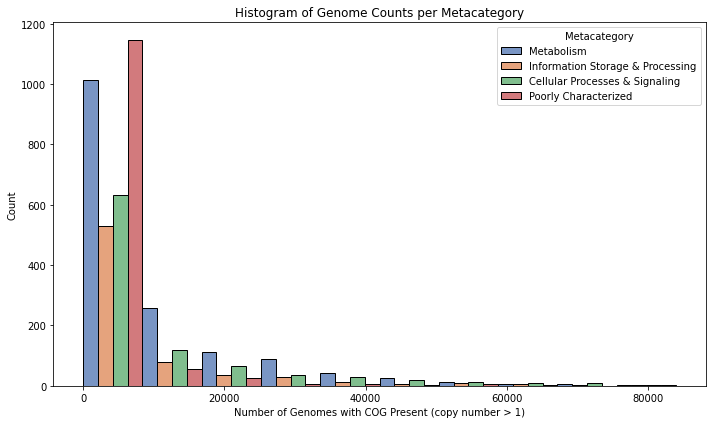

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    data=merged_perf,
    x="Genome_Count",
    hue="Metacategory",
    palette="deep",
    multiple="dodge",  # You can change to "dodge" for side-by-side bars
    bins=10
)
#plt.yscale("log")  # Set x-axis to logarithmic scale

plt.title("Histogram of Genome Counts per Metacategory")
plt.xlabel("Number of Genomes with COG Present (copy number > 1)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

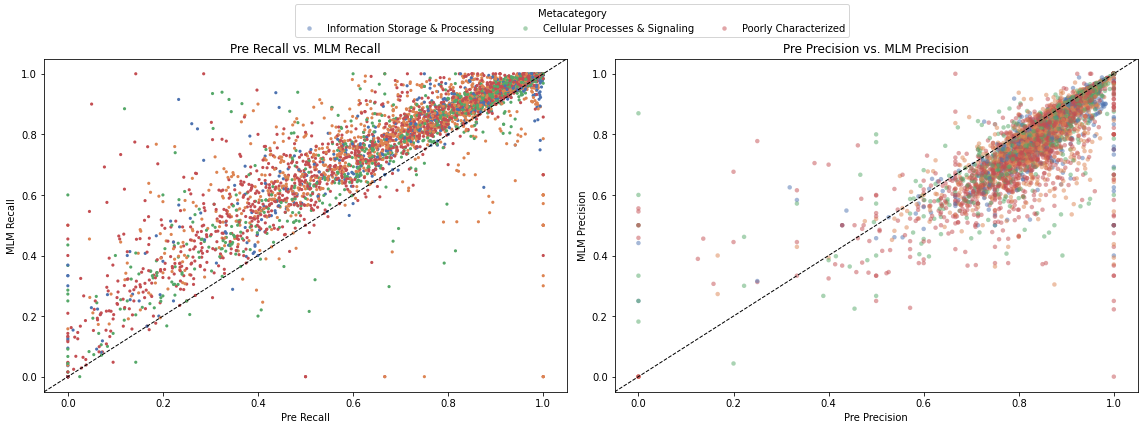

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom order for metacategories.
custom_order = ["Information Storage & Processing", "Metabolism", "Cellular Processes & Signaling", "Poorly Characterized"]

# Obtain colors from the deep palette for the given order.
deep_colors = sns.color_palette("deep", n_colors=len(custom_order))
meta_to_color = dict(zip(custom_order, deep_colors))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left subplot: Pre Recall vs. MLM Recall
sns.scatterplot(
    data=merged_df,
    x="pre_recall",
    y="mlm_recall",
    hue="Metacategory",
    palette=meta_to_color,
    s=10,
        alpha=1,

    linewidth=0,
    ax=axes[0]
)
axes[0].set_title("Pre Recall vs. MLM Recall")
axes[0].set_xlabel("Pre Recall")
axes[0].set_ylabel("MLM Recall")

# Add a black dashed diagonal line for the recall plot.
lims = [min(axes[0].get_xlim()[0], axes[0].get_ylim()[0]),
        max(axes[0].get_xlim()[1], axes[0].get_ylim()[1])]
axes[0].plot(lims, lims, 'k--', linewidth=1)
axes[0].set_xlim(lims)
axes[0].set_ylim(lims)

# Right subplot: Pre Precision vs. MLM Precision
sns.scatterplot(
    data=merged_df,
    x="pre_precision",
    y="mlm_precision",
    hue="Metacategory",
    palette=meta_to_color,
    s=20,
    alpha=0.5,
    linewidth=0,
    ax=axes[1]
)
axes[1].set_title("Pre Precision vs. MLM Precision")
axes[1].set_xlabel("Pre Precision")
axes[1].set_ylabel("MLM Precision")

# Add a black dashed diagonal line for the precision plot.
lims2 = [min(axes[1].get_xlim()[0], axes[1].get_ylim()[0]),
         max(axes[1].get_xlim()[1], axes[1].get_ylim()[1])]
axes[1].plot(lims2, lims2, 'k--', linewidth=1)
axes[1].set_xlim(lims2)
axes[1].set_ylim(lims2)

# Adjust the legend. If desired, you can remove duplicate legends:
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles[1:], labels[1:], title="Metacategory", loc="upper center", ncol=len(custom_order))
axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

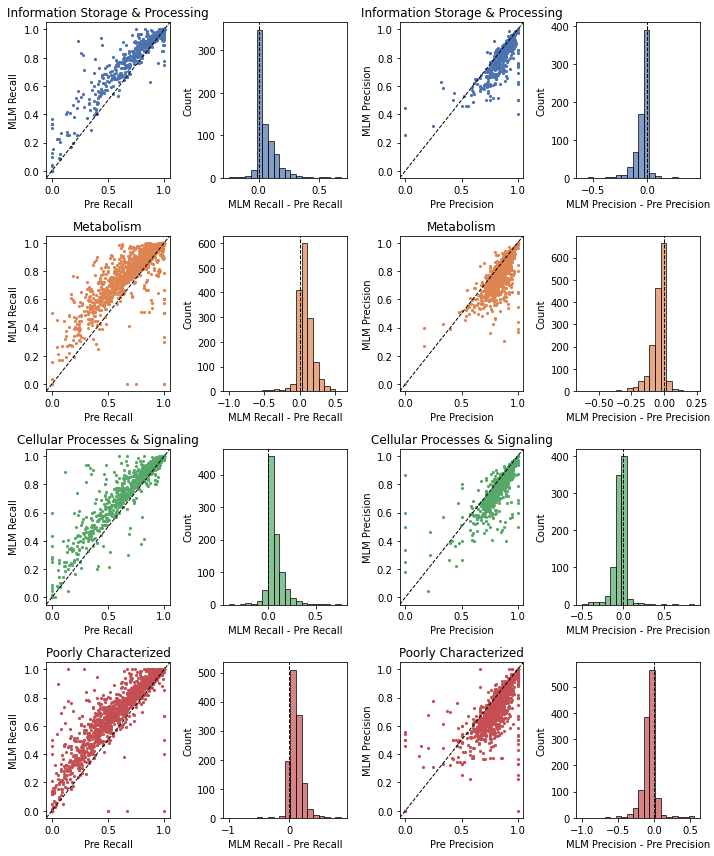

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom order for metacategories.
custom_order = ["Information Storage & Processing", "Metabolism", "Cellular Processes & Signaling", "Poorly Characterized"]

# Obtain colors from the deep palette for the given order.
deep_colors = sns.color_palette("deep", n_colors=len(custom_order))
meta_to_color = dict(zip(custom_order, deep_colors))

# Create a figure with 4 rows (metacategories) and 4 columns.
fig, axes = plt.subplots(nrows=len(custom_order), ncols=4, figsize=(10, 12))

for i, metacat in enumerate(custom_order):
    # Filter data for the current metacategory.
    df_meta = merged_df[merged_df["Metacategory"] == metacat]
    color = meta_to_color.get(metacat, "#7f7f7f")
    
    ## Recall Section
    # Column 0: Scatter plot of pre_recall vs. mlm_recall.
    ax_scatter_recall = axes[i, 0]
    sns.scatterplot(
        data=df_meta,
        x="pre_recall",
        y="mlm_recall",
        s=10,
        linewidth=0,
        color=color,
        ax=ax_scatter_recall
    )
    ax_scatter_recall.set_title(f"{metacat}")
    ax_scatter_recall.set_xlabel("Pre Recall")
    ax_scatter_recall.set_ylabel("MLM Recall")
    # Add black dashed diagonal line (x = y)
    lims = [min(ax_scatter_recall.get_xlim()[0], ax_scatter_recall.get_ylim()[0]),
            max(ax_scatter_recall.get_xlim()[1], ax_scatter_recall.get_ylim()[1])]
    ax_scatter_recall.plot(lims, lims, 'k--', linewidth=1)
    ax_scatter_recall.set_xlim(lims)
    ax_scatter_recall.set_ylim(lims)
    
    # Column 1: Histogram of the difference: mlm_recall - pre_recall.
    ax_hist_recall = axes[i, 1]
    difference_recall = df_meta["mlm_recall"] - df_meta["pre_recall"]
    ax_hist_recall.hist(difference_recall, bins=20, color=color, edgecolor="black", alpha=0.7)
    ax_hist_recall.axvline(0, color='k', linestyle='--', linewidth=1)
#    ax_hist_recall.set_title(f"{metacat} ")
    ax_hist_recall.set_xlabel("MLM Recall - Pre Recall")
    ax_hist_recall.set_ylabel("Count")
    
    ## Precision Section
    # Column 2: Scatter plot of pre_precision vs. mlm_precision.
    ax_scatter_precision = axes[i, 2]
    sns.scatterplot(
        data=df_meta,
        x="pre_precision",
        y="mlm_precision",
        s=10,
        linewidth=0,
        color=color,
        ax=ax_scatter_precision
    )
    ax_scatter_precision.set_title(f"{metacat}")
    ax_scatter_precision.set_xlabel("Pre Precision")
    ax_scatter_precision.set_ylabel("MLM Precision")
    # Add black dashed diagonal line (x = y)
    lims2 = [min(ax_scatter_precision.get_xlim()[0], ax_scatter_precision.get_ylim()[0]),
             max(ax_scatter_precision.get_xlim()[1], ax_scatter_precision.get_ylim()[1])]
    ax_scatter_precision.plot(lims2, lims2, 'k--', linewidth=1)
    ax_scatter_precision.set_xlim(lims2)
    ax_scatter_precision.set_ylim(lims2)
    
    # Column 3: Histogram of the difference: mlm_precision - pre_precision.
    ax_hist_precision = axes[i, 3]
    difference_precision = df_meta["mlm_precision"] - df_meta["pre_precision"]
    ax_hist_precision.hist(difference_precision, bins=20, color=color, edgecolor="black", alpha=0.7)
    ax_hist_precision.axvline(0, color='k', linestyle='--', linewidth=1)
#    ax_hist_precision.set_title(f"{metacat} ")
    ax_hist_precision.set_xlabel("MLM Precision - Pre Precision")
    ax_hist_precision.set_ylabel("Count")

plt.tight_layout()
plt.show()


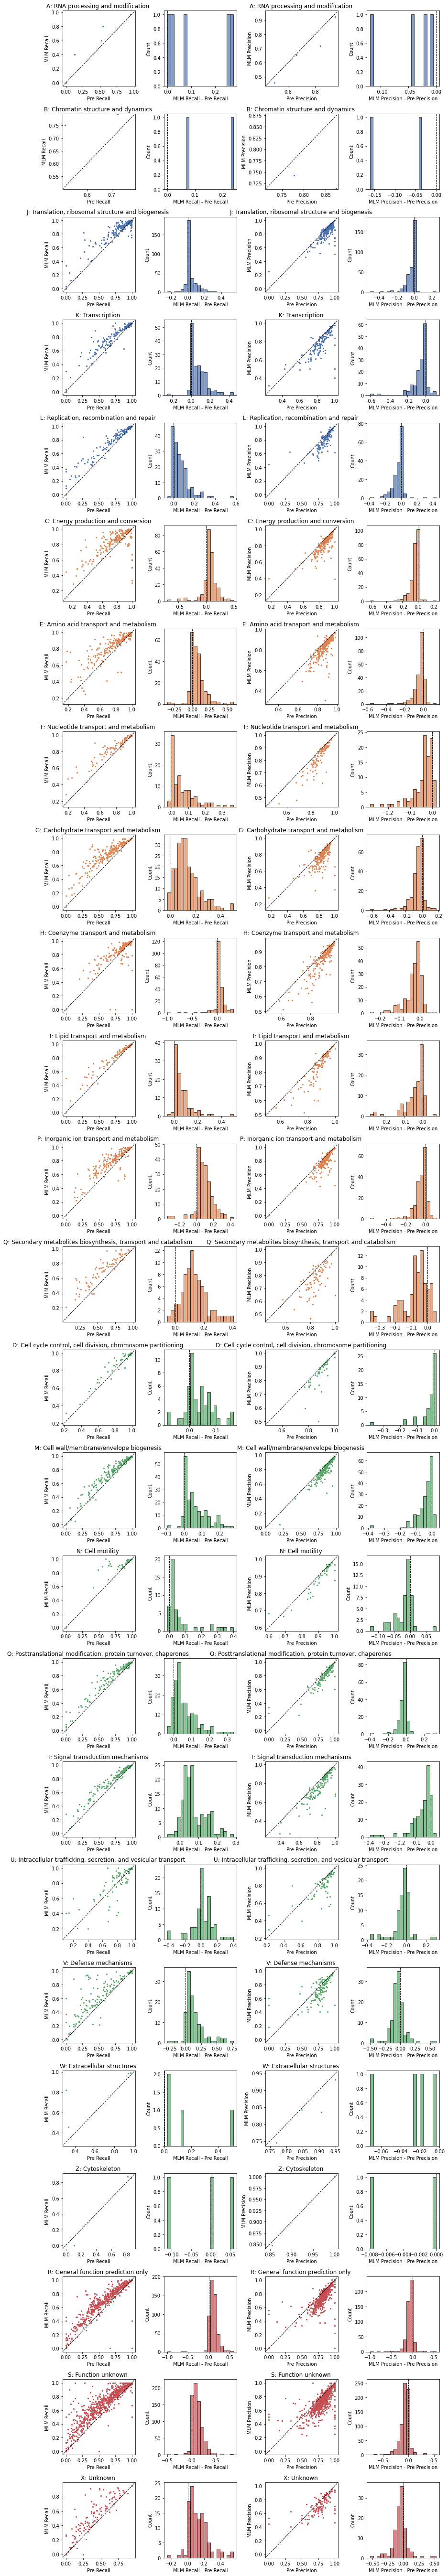

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup: Filter and Label by COG Category ---

# Lookup for full descriptive names for each COG category.
category_full_names = {
    "J": "Translation, ribosomal structure and biogenesis",
    "A": "RNA processing and modification",
    "K": "Transcription",
    "L": "Replication, recombination and repair",
    "B": "Chromatin structure and dynamics",
    "D": "Cell cycle control, cell division, chromosome partitioning",
    "Y": "Nuclear structure",
    "V": "Defense mechanisms",
    "T": "Signal transduction mechanisms",
    "M": "Cell wall/membrane/envelope biogenesis",
    "N": "Cell motility",
    "Z": "Cytoskeleton",
    "W": "Extracellular structures",
    "U": "Intracellular trafficking, secretion, and vesicular transport",
    "O": "Posttranslational modification, protein turnover, chaperones",
    "C": "Energy production and conversion",
    "E": "Amino acid transport and metabolism",
    "F": "Nucleotide transport and metabolism",
    "G": "Carbohydrate transport and metabolism",
    "H": "Coenzyme transport and metabolism",
    "I": "Lipid transport and metabolism",
    "P": "Inorganic ion transport and metabolism",
    "Q": "Secondary metabolites biosynthesis, transport and catabolism",
    "R": "General function prediction only",
    "S": "Function unknown"
}

# Assuming meta_map is defined as in previous examples:
meta_map = {
    "S": "Poorly Characterized", "R": "Poorly Characterized",
    "Q": "Metabolism", "P": "Metabolism", "I": "Metabolism",
    "H": "Metabolism", "F": "Metabolism", "E": "Metabolism",
    "G": "Metabolism", "C": "Metabolism",
    "O": "Cellular Processes & Signaling", "U": "Cellular Processes & Signaling", "W": "Cellular Processes & Signaling",
    "N": "Cellular Processes & Signaling", "M": "Cellular Processes & Signaling", "T": "Cellular Processes & Signaling",
    "V": "Cellular Processes & Signaling", "D": "Cellular Processes & Signaling","Z" : "Cellular Processes & Signaling", "X":"Poorly Characterized",
    "B": "Information Storage & Processing", "L": "Information Storage & Processing", "K": "Information Storage & Processing",
    "A": "Information Storage & Processing", "J": "Information Storage & Processing"
}

# Filter to rows with a single-letter category.
df_single_cat = merged_df[merged_df["Category"].apply(lambda x: len(str(x)) == 1)].copy()

# Create a new descriptive label column in the form "Letter: Full Name".
df_single_cat["Category_Label"] = df_single_cat["Category"].apply(
    lambda x: f"{x}: {category_full_names.get(x, 'Unknown')}"
)

# For a per-category layout, determine the sorted order (here, simply sorted alphabetically by the label).
order = sorted(df_single_cat["Category_Label"].unique())

# --- Assign a Color for Each Category Based on Its Metacategory ---
# Define the custom order for metacategories.
custom_order = ["Information Storage & Processing", "Metabolism", "Cellular Processes & Signaling", "Poorly Characterized"]

# Use seaborn's deep palette (one color per metacategory).
deep_colors = sns.color_palette("deep", n_colors=len(custom_order))
meta_to_color = dict(zip(custom_order, deep_colors))

# For each category label, assign the color of its metacategory.
category_palette = {}
for lbl in order:
    letter = lbl.split(":")[0].strip()
    mc = meta_map.get(letter, "Unknown")
    category_palette[lbl] = meta_to_color.get(mc, "#7f7f7f")

# --- Create a Multi-Panel Figure with One Row per Category ---

n_rows = len(order)
fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(12, 3 * n_rows))

# Ensure axes is 2D.
if n_rows == 1:
    axes = [axes]

ordered_labels = []
for mc in custom_order:
    # Filter category labels whose metacategory (determined by meta_map) equals the current metacategory.
    labels_mc = [lbl for lbl in df_single_cat["Category_Label"].unique()
                 if meta_map.get(lbl.split(":")[0].strip()) == mc]
    # Optionally, sort within the metacategory group (e.g., alphabetically)
    labels_mc = sorted(labels_mc)
    ordered_labels.extend(labels_mc)

# Now use ordered_labels in your loop:
for i, lbl in enumerate(ordered_labels):
    # Your plotting code for each category goes here.    # Filter data for the current category.
    df_cat = df_single_cat[df_single_cat["Category_Label"] == lbl]
    color = category_palette[lbl]
    
    # Column 0: Scatter plot of pre_recall vs. mlm_recall.
    ax_scatter_recall = axes[i][0]
    sns.scatterplot(
        data=df_cat,
        x="pre_recall",
        y="mlm_recall",
        s=10,
        linewidth=0,
        color=color,
        ax=ax_scatter_recall
    )
    ax_scatter_recall.set_title(f"{lbl} ")
    ax_scatter_recall.set_xlabel("Pre Recall")
    ax_scatter_recall.set_ylabel("MLM Recall")
    lims = [min(ax_scatter_recall.get_xlim()[0], ax_scatter_recall.get_ylim()[0]),
            max(ax_scatter_recall.get_xlim()[1], ax_scatter_recall.get_ylim()[1])]
    ax_scatter_recall.plot(lims, lims, 'k--', linewidth=1)
    ax_scatter_recall.set_xlim(lims)
    ax_scatter_recall.set_ylim(lims)
    
    # Column 1: Histogram of the difference (mlm_recall - pre_recall).
    ax_hist_recall = axes[i][1]
    diff_recall = df_cat["mlm_recall"] - df_cat["pre_recall"]
    ax_hist_recall.hist(diff_recall, bins=20, color=color, edgecolor="black", alpha=0.7)
    ax_hist_recall.axvline(0, color='k', linestyle='--', linewidth=1)
#    ax_hist_recall.set_title(f"{lbl} - Recall Difference")
    ax_hist_recall.set_xlabel("MLM Recall - Pre Recall")
    ax_hist_recall.set_ylabel("Count")
    
    # Column 2: Scatter plot of pre_precision vs. mlm_precision.
    ax_scatter_precision = axes[i][2]
    sns.scatterplot(
        data=df_cat,
        x="pre_precision",
        y="mlm_precision",
        s=10,
        linewidth=0,
        color=color,
        ax=ax_scatter_precision
    )
    ax_scatter_precision.set_title(f"{lbl} ")
    ax_scatter_precision.set_xlabel("Pre Precision")
    ax_scatter_precision.set_ylabel("MLM Precision")
    lims2 = [min(ax_scatter_precision.get_xlim()[0], ax_scatter_precision.get_ylim()[0]),
             max(ax_scatter_precision.get_xlim()[1], ax_scatter_precision.get_ylim()[1])]
    ax_scatter_precision.plot(lims2, lims2, 'k--', linewidth=1)
    ax_scatter_precision.set_xlim(lims2)
    ax_scatter_precision.set_ylim(lims2)
    
    # Column 3: Histogram of the difference (mlm_precision - pre_precision).
    ax_hist_precision = axes[i][3]
    diff_precision = df_cat["mlm_precision"] - df_cat["pre_precision"]
    ax_hist_precision.hist(diff_precision, bins=20, color=color, edgecolor="black", alpha=0.7)
    ax_hist_precision.axvline(0, color='k', linestyle='--', linewidth=1)
#    ax_hist_precision.set_title(f"{lbl} - Precision Difference")
    ax_hist_precision.set_xlabel("MLM Precision - Pre Precision")
    ax_hist_precision.set_ylabel("Count")

plt.tight_layout()
plt.show
plt.tight_layout()
plt.savefig("percat_MLM_enhance.pdf", bbox_inches="tight")
plt.show()

(('pre_recall', 'Pre Recall'),)

In [85]:
ordered_labels

['A: RNA processing and modification',
 'B: Chromatin structure and dynamics',
 'J: Translation, ribosomal structure and biogenesis',
 'K: Transcription',
 'L: Replication, recombination and repair',
 'C: Energy production and conversion',
 'E: Amino acid transport and metabolism',
 'F: Nucleotide transport and metabolism',
 'G: Carbohydrate transport and metabolism',
 'H: Coenzyme transport and metabolism',
 'I: Lipid transport and metabolism',
 'P: Inorganic ion transport and metabolism',
 'Q: Secondary metabolites biosynthesis, transport and catabolism',
 'D: Cell cycle control, cell division, chromosome partitioning',
 'M: Cell wall/membrane/envelope biogenesis',
 'N: Cell motility',
 'O: Posttranslational modification, protein turnover, chaperones',
 'T: Signal transduction mechanisms',
 'U: Intracellular trafficking, secretion, and vesicular transport',
 'V: Defense mechanisms',
 'W: Extracellular structures',
 'R: General function prediction only',
 'S: Function unknown']

KeyboardInterrupt: 

2025-03-05 11:28:27,056	INFO worker.py:1672 -- Calling ray.init() again after it has already been called.
Computing Metrics: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8185/8185 [00:05<00:00, 1470.68it/s]


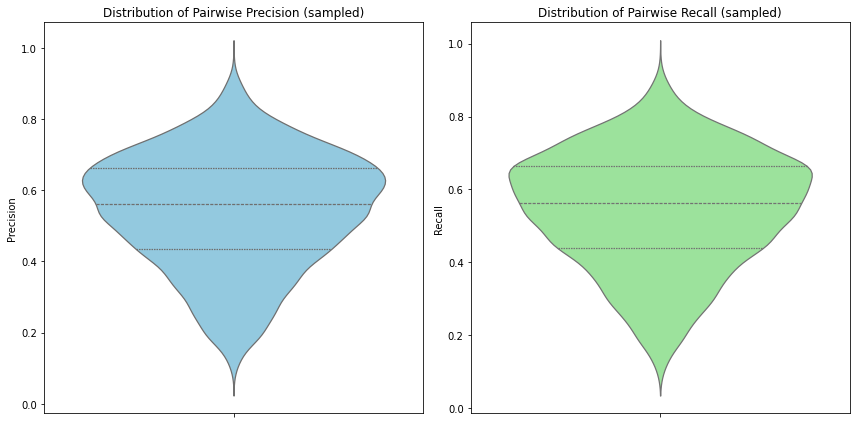

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ray
from tqdm import tqdm

# Initialize Ray.
ray.init(ignore_reinit_error=True)

# --- 1. Filter train_df to only columns starting with "COG" ---
cog_cols = [col for col in train_df.columns if col.startswith("COG")]
df_cogs = train_df[cog_cols]
n = df_cogs.shape[0]

# --- 2. Precompute a boolean presence array (True if copy number > 0) ---
presence = (df_cogs.values > 0)

# --- 3. Randomly sample a fraction (default 0.01) of all ordered pairs of rows ---
fraction = 0.000001  # default fraction of pairs to compute
total_pairs = n * (n - 1)
num_samples = int(fraction * total_pairs)

# We'll oversample and then filter for distinct indices.
sample_factor = 2
while True:
    indices1 = np.random.randint(0, n, size=sample_factor * num_samples)
    indices2 = np.random.randint(0, n, size=sample_factor * num_samples)
    valid = indices1 != indices2
    pairs = np.column_stack((indices1[valid], indices2[valid]))
    if len(pairs) >= num_samples:
        pairs = pairs[:num_samples]
        break

# --- 4. Define a Ray remote function to compute precision and recall for a pair ---
@ray.remote
def compute_metrics(pair, presence):
    i, j = pair
    row_i = presence[i, :]
    row_j = presence[j, :]
    TP = np.sum(row_i & row_j)
    FP = np.sum(row_i & (~row_j))
    FN = np.sum((~row_i) & row_j)
    prec = TP / (TP + FP) if (TP + FP) > 0 else np.nan
    rec = TP / (TP + FN) if (TP + FN) > 0 else np.nan
    return prec, rec

# --- 5. Use Ray to compute metrics in parallel with a tqdm progress bar ---
futures = [compute_metrics.remote(pair, presence) for pair in pairs]

results = []
remaining = futures.copy()
with tqdm(total=len(futures), desc="Computing Metrics") as pbar:
    while remaining:
        # Wait for at least one task to complete.
        done, remaining = ray.wait(remaining, num_returns=1)
        # Update progress bar with the number of tasks completed.
        pbar.update(len(done))
        # Retrieve the results from the completed tasks.
        results.extend(ray.get(done))

# Unzip results into separate lists.
precision_values, recall_values = zip(*results)

# Create a DataFrame with the computed metrics.
df_pair_metrics = pd.DataFrame({
    "Precision": precision_values,
    "Recall": recall_values
})

# --- 6. Plot the results as violin plots ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(y=df_pair_metrics["Precision"], inner="quartile", color="skyblue")
plt.title("Distribution of Pairwise Precision (sampled)")
plt.ylabel("Precision")
plt.xlabel("")

plt.subplot(1, 2, 2)
sns.violinplot(y=df_pair_metrics["Recall"], inner="quartile", color="lightgreen")
plt.title("Distribution of Pairwise Recall (sampled)")
plt.ylabel("Recall")
plt.xlabel("")

plt.tight_layout()
plt.show()

# Optionally, shut down Ray.
ray.shutdown()